**PERCEPTRON:** Simple Neural Network with only 1 neuron.

In [ ]:
#Import libraries
from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt
import numpy as np

In [6]:
#Generate random data function
def generate_data(N):
  y = np.zeros((N, ))

  while len(y[y == -1]) == 0 or len(y[y == 1]) == 0:
    X = np.random.uniform(-1, 1, (N, 2))
    for i, x in enumerate(X):
      if 2 * x[0] + x[1] < 0.7:
        y[i] = -1
      else:
        y[i] = 1
  
  return X, y

[]

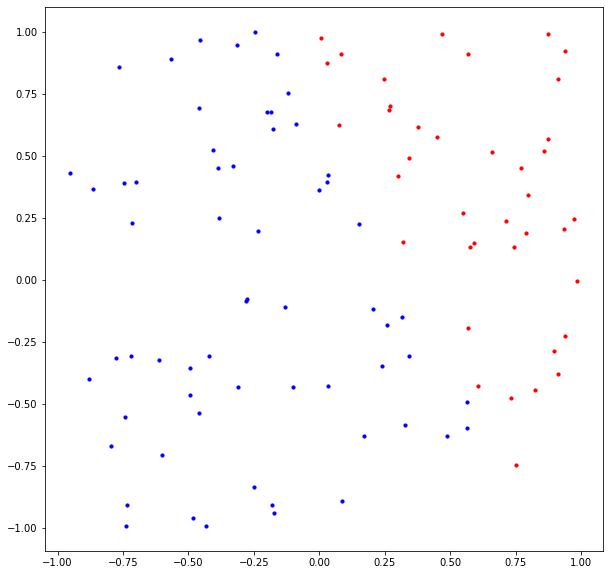

In [8]:
#Generate data and plot by categories
X, y = generate_data(100)

x_cat1 = X[y == -1]
x_cat2 = X[y == 1]

plt.figure(figsize=(10, 10))
plt.scatter(x_cat1[:, 0], x_cat1[:, 1], c='blue', s=10)
plt.scatter(x_cat2[:, 0], x_cat2[:, 1], c='red', s=10)
plt.plot()

In [9]:
#Predict function
def predict(X, w):
  result = X @ w
  return np.sign(result).reshape(-1)

In [12]:
#Train function
def train(X, y):
  w = np.zeros((3, 1))
  w_history = []
  X_ones = np.hstack((np.ones((X.shape[0], 1)), X))
  indexes = np.arange(X_ones.shape[0])

  while True:
    y_hat = predict(X_ones, w)
    diferences = y_hat != y
    indexes_diferences = indexes[diferences]

    if len(indexes_diferences) == 0:
      break
    
    index = np.random.choice(indexes_diferences)
    w[:, 0] = w[:, 0] + y[index] * X_ones[index]
    w_history.append(w.copy())
  
  return w, w_history

In [13]:
#Generate 100 dots and train the model
X, y = generate_data(100)
w, w_history = train(X, y)

In [14]:
#Update function
def update(i):
  x = np.arange(-1, 2, 1)
  weights = w_history[i]
  y_pred = -(weights[1] / weights[2]) * x - (weights[0] / weights[2])

  x_cat1 = X[y == -1]
  x_cat2 = X[y == 1]

  plt.clf()
  plt.xlim(-1, 1)
  plt.ylim(-1, 1)
  plt.scatter(x_cat1[:, 0], x_cat1[:, 1], c = 'blue', s=10)
  plt.scatter(x_cat2[:, 0], x_cat2[:, 1], c='red', s=10)

In [15]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [16]:
len(w_history)

52

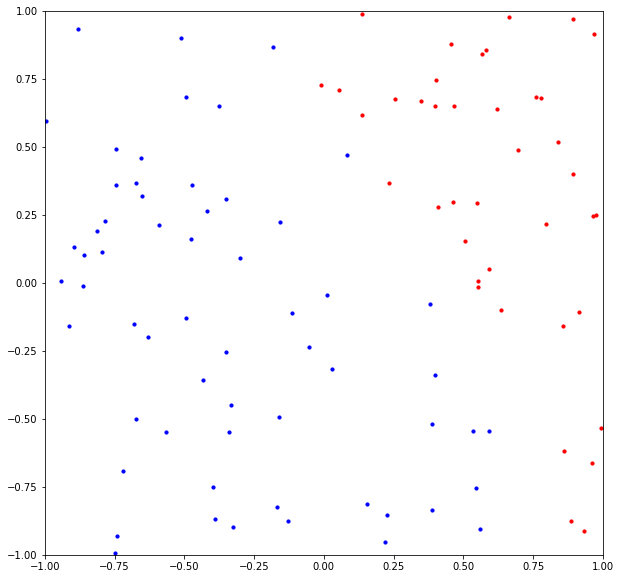

In [17]:
anim = FuncAnimation(plt.figure(figsize=(10, 10)), update, frames=np.arange(0, len(w_history)), interval=200)
anim.save('line.gif', dpi=80, writer='imagemagick')